   Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   

   most ads hour  
0             20  
1             22  
2             18  
3             10  
4             14  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null

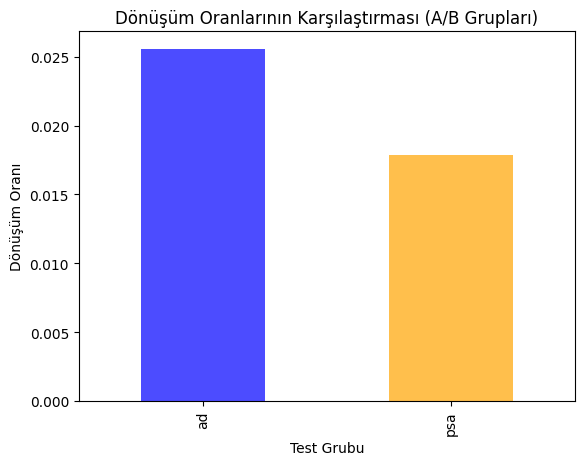

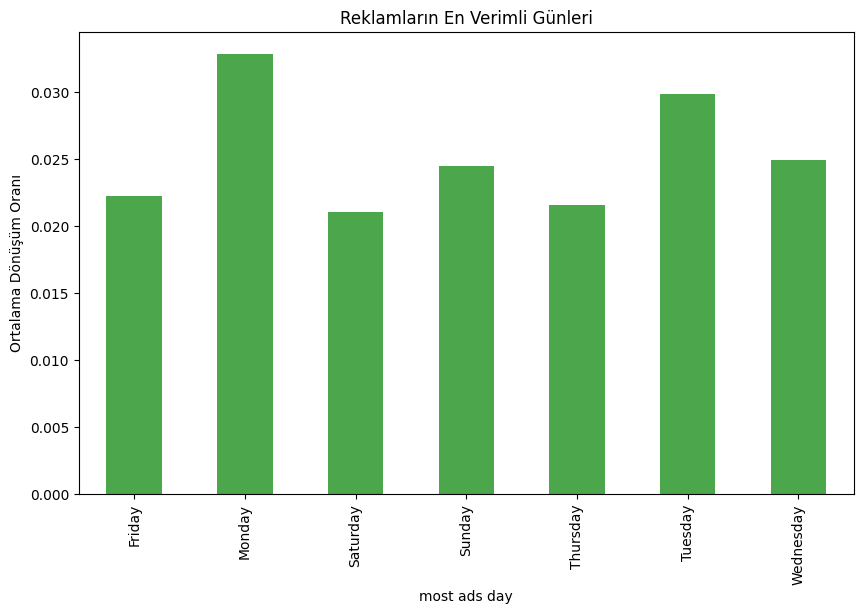

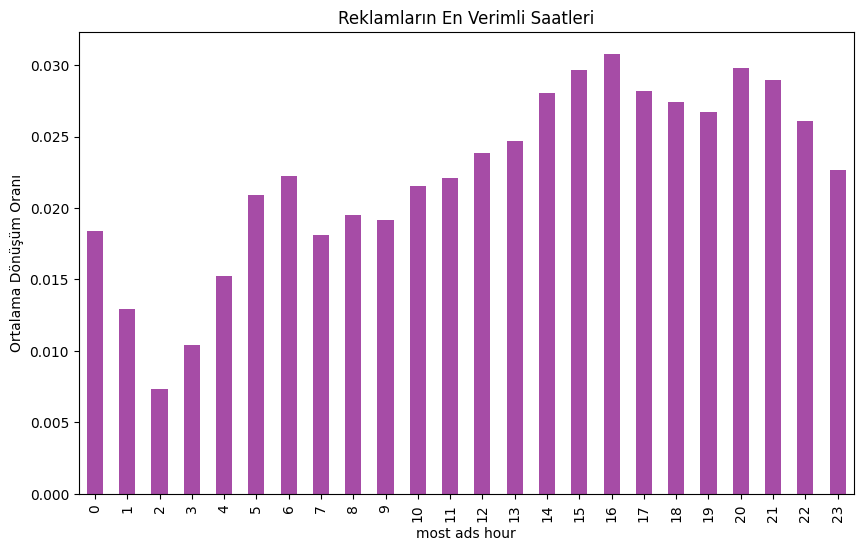

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Veri setini yükle
data = pd.read_csv('/kaggle/input/marketing-ab-testing/marketing_AB.csv')

# İlk birkaç satıra göz at
print(data.head())

# Veri bilgisi ve eksik değerler
print(data.info())
print(data.isnull().sum())

# 'test group' sütunundaki benzersiz değerleri kontrol et
print("Benzersiz test grubu değerleri:", data['test group'].unique())

# 'test group' sütunundaki boşlukları temizle
data['test group'] = data['test group'].str.strip()

# 'converted' sütununu sayısal hale getir (True: 1, False: 0)
data['converted'] = data['converted'].astype(int)

# Test gruplarına göre dönüşüm oranlarını hesapla
conversion_rate = data.groupby('test group')['converted'].mean()
print(conversion_rate)

# En fazla reklam görülen gün ve saatlerin dönüşüm oranlarını hesapla
most_ads_day_conversion = data.groupby('most ads day')['converted'].mean()
most_ads_hour_conversion = data.groupby('most ads hour')['converted'].mean()

# Sonuçları yazdır
print("En verimli günlerin dönüşüm oranları:")
print(most_ads_day_conversion)

print("En verimli saatlerin dönüşüm oranları:")
print(most_ads_hour_conversion)

# A ve B gruplarını ayır
group_ad = data[data['test group'] == 'ad']
group_psa = data[data['test group'] == 'psa']

# Grupların boyutlarını kontrol et
print(f"Group Ad size: {group_ad.shape[0]}")
print(f"Group Psa size: {group_psa.shape[0]}")

# T-testini uygulama
t_stat, p_value = ttest_ind(group_ad['converted'], group_psa['converted'])

alpha = 0.05  # %5 anlamlılık seviyesi
print(f"T-istatistiği: {t_stat:.2f}, P-değeri: {p_value:.4f}")

if p_value < alpha:
    print("Sonuç: Null hipotezi reddediyoruz. Gruplar arasında anlamlı bir fark var.")
else:
    print("Sonuç: Null hipotezi reddedemiyoruz. Gruplar arasında anlamlı bir fark yok.")

# Dönüşüm oranlarını karşılaştıran bar grafiği
conversion_rate.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title("Dönüşüm Oranlarının Karşılaştırması (A/B Grupları)")
plt.ylabel("Dönüşüm Oranı")
plt.xlabel("Test Grubu")
plt.show()

# En verimli günleri görselleştir
plt.figure(figsize=(10, 6))
most_ads_day_conversion.plot(kind='bar', color='green', alpha=0.7)
plt.title("Reklamların En Verimli Günleri")
plt.ylabel("Ortalama Dönüşüm Oranı")
plt.show()

# En verimli saatleri görselleştir
plt.figure(figsize=(10, 6))
most_ads_hour_conversion.plot(kind='bar', color='purple', alpha=0.7)
plt.title("Reklamların En Verimli Saatleri")
plt.ylabel("Ortalama Dönüşüm Oranı")
plt.show()